In [3]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 1000  # number of users

# ---- Generate synthetic features ----
data = pd.DataFrame({
    'upi_txn_count': np.random.randint(5, 400, n),
    'avg_txn_value': np.random.uniform(50, 2500, n),
    'bill_payments': np.random.randint(0, 10, n),
    'wallet_balance': np.random.uniform(100, 10000, n),
    'sms_count': np.random.randint(100, 2500, n),
    'data_usage_gb': np.random.uniform(0.5, 30, n),
    'ecom_purchases': np.random.randint(0, 30, n),
    'refund_count': np.random.randint(0, 6, n),
    'income_bracket': np.random.randint(1, 6, n),
    'age': np.random.randint(18, 60, n),
})

# ---- Derived metrics ----
data['txn_variance'] = np.random.uniform(10, 800, n)

# ---- Credit Score (target) ----
data['credit_score'] = (
    300
    + 0.08 * data['upi_txn_count']
    + 0.04 * data['bill_payments']
    + 0.03 * data['data_usage_gb'] * 100
    + 10 * data['income_bracket']
    - 5 * data['refund_count']
    + np.random.normal(0, 20, n)
)
data['credit_score'] = data['credit_score'].clip(300, 850)

# ---- Fraud flag ----
fraud_prob = (
    0.02 * (data['refund_count']**2)
    + 0.00005 * data['upi_txn_count']
    + 0.0001 * data['txn_variance']
)
data['is_fraud'] = (fraud_prob > np.random.rand(n)).astype(int)

# ---- Save ----
data.to_csv("data/synthetic_fin_data.csv", index=False)

print(data.head())
print(data['is_fraud'].value_counts())


OSError: Cannot save file into a non-existent directory: 'data'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   upi_txn_count   1000 non-null   int32  
 1   avg_txn_value   1000 non-null   float64
 2   bill_payments   1000 non-null   int32  
 3   wallet_balance  1000 non-null   float64
 4   sms_count       1000 non-null   int32  
 5   data_usage_gb   1000 non-null   float64
 6   ecom_purchases  1000 non-null   int32  
 7   refund_count    1000 non-null   int32  
 8   income_bracket  1000 non-null   int32  
 9   age             1000 non-null   int32  
 10  txn_variance    1000 non-null   float64
 11  credit_score    1000 non-null   float64
 12  is_fraud        1000 non-null   int32  
dtypes: float64(5), int32(8)
memory usage: 70.4 KB
None
       upi_txn_count  avg_txn_value  bill_payments  wallet_balance  \
count    1000.000000    1000.000000    1000.000000     1000.000000   
mean      202.717000   

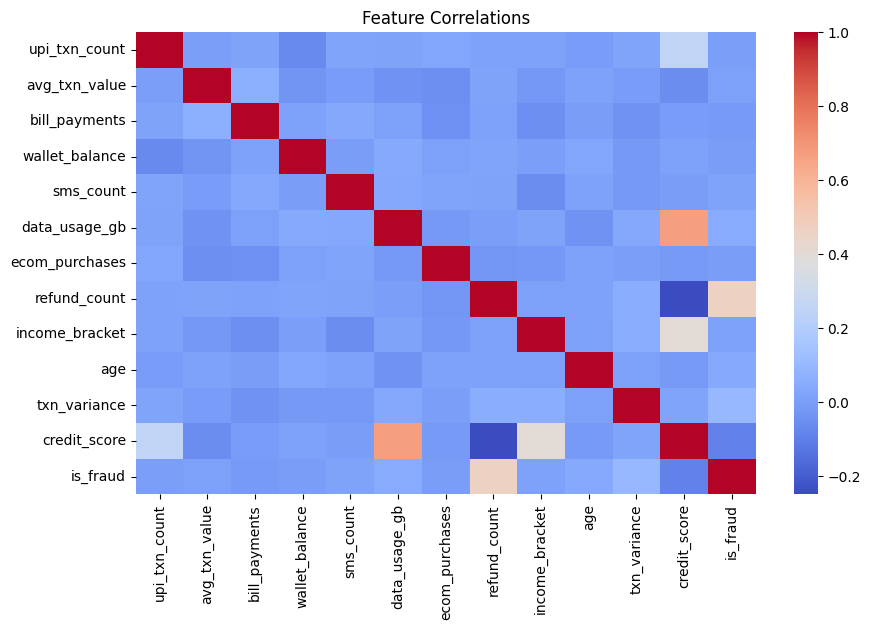

In [6]:
# Basic checks
print(data.info())
print(data.describe())

# Correlation heatmap (optional visualization)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlations")
plt.show()